### 목표 : 당뇨병 예측 모델 구현
- 데이터 : scikit-learn dataset
- 피쳐 : 10
- 타겟 : 정수값

#### (1) 모듈 로딩 및 데이터 준비

In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import mlx.core as mx
import time

In [346]:
## 데이터 로딩
diabetes = load_diabetes()

In [347]:
featureArray = diabetes['data']
targetArray = diabetes['target']
feature_names=diabetes.feature_names

In [348]:
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [349]:
featureArray.shape, targetArray.shape

((442, 10), (442,))

In [350]:
featureArray

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [351]:
targetArray

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [352]:
featureDF, targetDF = load_diabetes(return_X_y=True, as_frame=True)

In [369]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
targetScaled = scaler.fit(pd.DataFrame(targetDF))

targetScaled=scaler.transform(pd.DataFrame(targetDF))
# targetScaled

In [370]:
featureDF

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [371]:
targetDF

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [372]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [373]:
# X_train, X_test, y_train, y_test = train_test_split(featureDF,
#                                     targetDF,
#                                     test_size=0.3,
#                                     random_state=10)

In [374]:
# # X_train, X_test, y_train, y_test = train_test_split(featureDF,
# #                                                     targetDF,
# #                                                     test_size=0.3,
# #                                                     random_state=1234)
# 
# for k in range(10):
#     for l in range(10):
#         for a in range(1,20):
#             if k<l:
#                 for b in range(1000):
#                     X_train, X_test, y_train, y_test = train_test_split(featureDF,
#                                                         targetDF,
#                                                         test_size=0.3,
#                                                         random_state=b)
#                 X_train = X_train[X_train.columns[k:l]]
#                 X_test = X_test[X_test.columns[k:l]]
#                 model = KNeighborsRegressor(n_neighbors=a)
#                 model.fit(pd.DataFrame(X_train), y_train)
#                 y_pre = model.predict(X_test)
#                 y_pre = np.round(y_pre,1)
#                 r2ret = r2_score(y_test, y_pre)
#                 mse = mean_squared_error(y_test, y_pre)
#                 rmse = mean_squared_error(y_test, y_pre, squared=False)
#                 mae = mean_absolute_error(y_test, y_pre)
#                 if (model.score(pd.DataFrame(X_train), y_train))>0.5 and (model.score(pd.DataFrame(X_test), y_test))>0.5:
#                     if r2ret>0.5:
#                         print(f'k={a}, random_state={b}')
#                         print(f'k={k}, l={l}')
#                         print(f'훈련 점수 : {model.score(pd.DataFrame(X_train), y_train):.1f}, 테스트 점수 : {model.score(pd.DataFrame(X_test), y_test):.1f}')
#                         print(f'R2:{r2ret:.2f}, MSE:{mse:.2f}, RMSE:{rmse:.2f}, MAE:{mae:.2f}')
#                         print()

In [375]:
targetScaled

array([[-1.47194752e-02],
       [-1.00165882e+00],
       [-1.44579915e-01],
       [ 6.99512942e-01],
       [-2.22496178e-01],
       [-7.15965848e-01],
       [-1.83538046e-01],
       [-1.15749134e+00],
       [-5.47147277e-01],
       [ 2.05006151e+00],
       [-6.64021672e-01],
       [-1.07957508e+00],
       [ 3.48889755e-01],
       [ 4.26806019e-01],
       [-4.43258925e-01],
       [ 2.45001404e-01],
       [ 1.80071184e-01],
       [-1.05621783e-01],
       [-7.15965848e-01],
       [ 2.06043272e-01],
       [-1.09256112e+00],
       [-1.33929596e+00],
       [-1.09256112e+00],
       [ 1.20596866e+00],
       [ 4.13819975e-01],
       [ 6.47568766e-01],
       [-1.96524090e-01],
       [-8.71798376e-01],
       [-2.74440354e-01],
       [ 1.69943833e+00],
       [-3.00412442e-01],
       [-1.20943552e+00],
       [ 2.45262887e+00],
       [-8.45826288e-01],
       [-1.13151925e+00],
       [-6.51035629e-01],
       [ 1.46568953e+00],
       [ 1.60853602e+00],
       [ 1.2

In [376]:
featureDF.columns[1]

'sex'

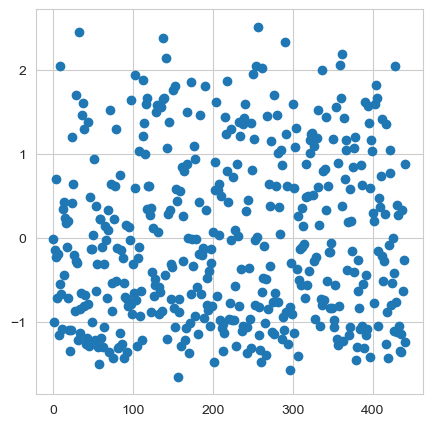

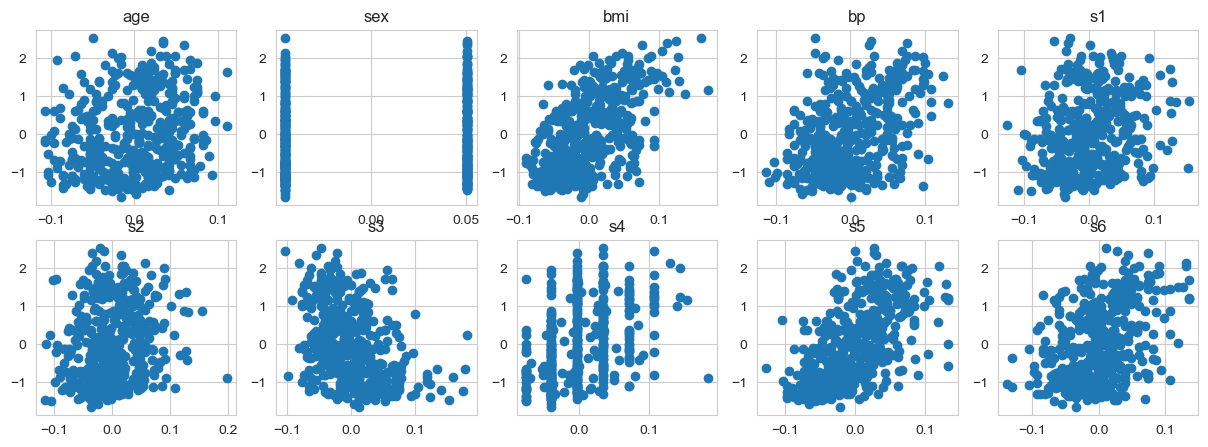

In [377]:
start = time.time()
mx.
import matplotlib.pyplot as plt
# plt.hist(featureDF)
# plt.hist(targetDF)
plt.figure(figsize=(5,5))
plt.scatter(pd.DataFrame(targetScaled).index, targetScaled)
plt.show()
fig, ax = plt.subplots(2,5,figsize=(15,5))
for k in range(10):
    row_index = k // 5
    col_index = k % 5
    ax[row_index, col_index].scatter(featureDF[featureDF.columns[k]], targetScaled)
    ax[row_index, col_index].set_title(f'{featureDF.columns[k]}'.format(k+1))  
plt.tight_layout
plt.show()

print(f"cpu elapsed time: {time.time()-start}")


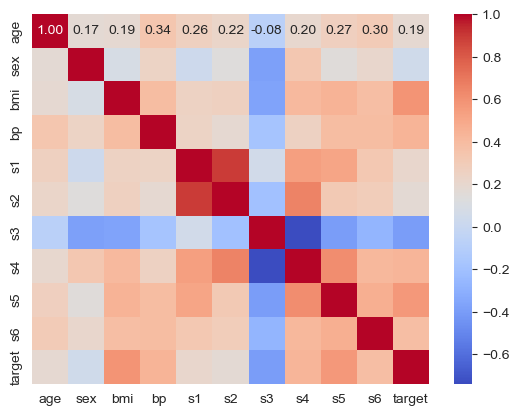

In [378]:
import seaborn as sns

totalDF = pd.concat([featureDF, targetDF], axis=1)
totalDF
corr = totalDF.corr()
corr

heat = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

### [1] bmi와 s5 선택
- target과의 corr을 볼 때 bmi와 s5의 색이 짙음

In [363]:
bmis5 = featureDF[['bmi','s5']]
bmis5

,bmi,s5
0,0.061696,0.019907
1,-0.051474,-0.068332
2,0.044451,0.002861
3,-0.011595,0.022688
4,-0.036385,-0.031988
...,...,...
437,0.019662,0.031193
438,-0.015906,-0.018114
439,-0.015906,-0.046883
440,0.039062,0.044529


In [403]:
# bmis5 = featureDF[['bmi','s5']]

X_train, X_test, y_train, y_test = train_test_split(bmis5,
                                                    targetDF,
                                                    test_size=0.3,
                                                    random_state=1234)


for a in range(1,len(y_train)+1):
    for b in range(100):
        X_train, X_test, y_train, y_test = train_test_split(bmis5,
                                            targetDF,
                                            test_size=0.3,
                                            random_state=b)

        model = KNeighborsRegressor(n_neighbors=a)
        model.fit(pd.DataFrame(X_train), y_train)
        y_pre = model.predict(X_test)
        y_pre = np.round(y_pre,1)
        r2ret = r2_score(y_test, y_pre)
        mse = mean_squared_error(y_test, y_pre)
        rmse = mean_squared_error(y_test, y_pre, squared=False)
        mae = mean_absolute_error(y_test, y_pre)
        if ((model.score(pd.DataFrame(X_train), y_train))>0.5 and (model.score(pd.DataFrame(X_test), y_test))>0.5) and (model.score(pd.DataFrame(X_train), y_train) < model.score(pd.DataFrame(X_test), y_test)):
            if r2ret>0.5:
                print(f'k={a}, random_state={b}')
                print(f'훈련 점수 : {model.score(pd.DataFrame(X_train), y_train):.3f}, 테스트 점수 : {model.score(pd.DataFrame(X_test), y_test):.3f}')
                print(f'R2:{r2ret:.2f}, MSE:{mse:.2f}, RMSE:{rmse:.2f}, MAE:{mae:.2f}')
                print(f'\n')
        # if (model.score(pd.DataFrame(X_train), y_train)) < (model.score(pd.DataFrame(X_test), y_test)):
        #     if r2ret>0.5:
        #         print(f'k={a}, random_state={b}')
        #         print(f'훈련 점수 : {model.score(pd.DataFrame(X_train), y_train):.3f}, 테스트 점수 : {model.score(pd.DataFrame(X_test), y_test):.3f}')
        #         print(f'R2:{r2ret:.2f}, MSE:{mse:.2f}, RMSE:{rmse:.2f}, MAE:{mae:.2f}')
        #         print(f'\n')

k=7, random_state=22
훈련 점수 : 0.505, 테스트 점수 : 0.527
R2:0.53, MSE:2922.89, RMSE:54.06, MAE:42.16

k=8, random_state=22
훈련 점수 : 0.504, 테스트 점수 : 0.521
R2:0.52, MSE:2960.65, RMSE:54.41, MAE:41.96


### [2] 전체 피쳐 조합으로 구해보기
#### [2-1] train_score, test_score > 0.5 정렬

In [365]:
# 피쳐 조합

from itertools import combinations


features = featureDF.columns
combinations_list = []

for r in range(1, len(features) + 1):
    for combo in combinations(features, r):
        combinations_list.append(list(combo))

results = []

for combo in combinations_list:
    # print(combo)
    X_combo = featureDF[combo]
    # print(X_combo)

['age']
['sex']
['bmi']
['bp']
['s1']
['s2']
['s3']
['s4']
['s5']
['s6']
['age', 'sex']
['age', 'bmi']
['age', 'bp']
['age', 's1']
['age', 's2']
['age', 's3']
['age', 's4']
['age', 's5']
['age', 's6']
['sex', 'bmi']
['sex', 'bp']
['sex', 's1']
['sex', 's2']
['sex', 's3']
['sex', 's4']
['sex', 's5']
['sex', 's6']
['bmi', 'bp']
['bmi', 's1']
['bmi', 's2']
['bmi', 's3']
['bmi', 's4']
['bmi', 's5']
['bmi', 's6']
['bp', 's1']
['bp', 's2']
['bp', 's3']
['bp', 's4']
['bp', 's5']
['bp', 's6']
['s1', 's2']
['s1', 's3']
['s1', 's4']
['s1', 's5']
['s1', 's6']
['s2', 's3']
['s2', 's4']
['s2', 's5']
['s2', 's6']
['s3', 's4']
['s3', 's5']
['s3', 's6']
['s4', 's5']
['s4', 's6']
['s5', 's6']
['age', 'sex', 'bmi']
['age', 'sex', 'bp']
['age', 'sex', 's1']
['age', 'sex', 's2']
['age', 'sex', 's3']
['age', 'sex', 's4']
['age', 'sex', 's5']
['age', 'sex', 's6']
['age', 'bmi', 'bp']
['age', 'bmi', 's1']
['age', 'bmi', 's2']
['age', 'bmi', 's3']
['age', 'bmi', 's4']
['age', 'bmi', 's5']
['age', 'bmi', 's6']

In [404]:
from itertools import combinations


features = featureDF.columns
combinations_list = []

for r in range(1, len(features) + 1):
    for combo in combinations(features, r):
        combinations_list.append(list(combo))
        
# results = []
#         
for combo in combinations_list:
    X_combo = featureDF[combo]
    print(combo)
#         
    for a in range(1,len(y_train)+1):
        # print(f'a:{a}')
        X_train, X_test, y_train, y_test = train_test_split(X_combo,
                                            targetDF,
                                            test_size=0.3,
                                            random_state=22)

        model = KNeighborsRegressor(n_neighbors=a)
        model.fit(pd.DataFrame(X_train), y_train)
        y_pre = model.predict(X_test)
        y_pre = np.round(y_pre,1)
        r2ret = r2_score(y_test, y_pre)
        mse = mean_squared_error(y_test, y_pre)
        rmse = mean_squared_error(y_test, y_pre, squared=False)
        mae = mean_absolute_error(y_test, y_pre)
        train_score = model.score(pd.DataFrame(X_train), y_train)
        test_score = model.score(pd.DataFrame(X_test), y_test)
        # results.append({'Features' : combo, 
        #                 'Train_score': train_score, 'Test_score':test_score,
        #                 'R2': r2ret, 'MSE':mse, 'RMSE':rmse, 'MAE':mae})
        if (train_score>0.5 and test_score>0.5) and (train_score < test_score):
            if r2ret>0.5:
                print(f'k={a}, random_state={b}')
                print(f"""'Features' : {combo},
    'Train_score': {train_score:.3f}, 'Test_score':{test_score:.3f},
    'R2': {r2ret:.2f}, 'MSE':{mse:.2f}, 'RMSE':{rmse:.2f}, 'MAE':{mae:.2f}""")
    
    # (train_score < test_score) and r2ret>0.5 , random_state=1 없음
    #     if train_score < test_score:
    #         if r2ret>0.5:
    #             print(f'k={a}, random_state={b}')
    #             print(f"""'Features' : {combo},
    # 'Train_score': {train_score:.3f}, 'Test_score':{test_score:.3f},
    # 'R2': {r2ret:.2f}, 'MSE':{mse:.2f}, 'RMSE':{rmse:.2f}, 'MAE':{mae:.2f}""")
    #             print()
    #             print()

['age']
['sex']
['bmi']
['bp']
['s1']
['s2']
['s3']
['s4']
['s5']
['s6']
['age', 'sex']
['age', 'bmi']
['age', 'bp']
['age', 's1']
['age', 's2']
['age', 's3']
['age', 's4']
['age', 's5']
['age', 's6']
['sex', 'bmi']
['sex', 'bp']
['sex', 's1']
['sex', 's2']
['sex', 's3']
['sex', 's4']
['sex', 's5']
['sex', 's6']
['bmi', 'bp']
['bmi', 's1']
['bmi', 's2']
['bmi', 's3']
['bmi', 's4']
['bmi', 's5']
k=7, random_state=99
'Features' : ['bmi', 's5'],
    'Train_score': 0.505, 'Test_score':0.527,
    'R2': 0.53, 'MSE':2922.89, 'RMSE':54.06, 'MAE':42.16
k=8, random_state=99
'Features' : ['bmi', 's5'],
    'Train_score': 0.504, 'Test_score':0.521,
    'R2': 0.52, 'MSE':2960.65, 'RMSE':54.41, 'MAE':41.96
['bmi', 's6']
['bp', 's1']
['bp', 's2']
['bp', 's3']
['bp', 's4']
['bp', 's5']
['bp', 's6']
['s1', 's2']
['s1', 's3']
['s1', 's4']
['s1', 's5']
['s1', 's6']
['s2', 's3']
['s2', 's4']
['s2', 's5']
['s2', 's6']
['s3', 's4']
['s3', 's5']
['s3', 's6']
['s4', 's5']
['s4', 's6']
['s5', 's6']
['age', 'se

#### [2-3] train_score < test_score

In [381]:
from itertools import combinations


features = featureDF.columns
combinations_list = []

for r in range(1, len(features) + 1):
    for combo in combinations(features, r):
        combinations_list.append(list(combo))
    
        results = []
        
        for combo in combinations_list:
            X_combo = featureDF[combo]
                
            for a in range(1,len(y_train)+1):
                # print(f'a:{a}')
                for b in range(1000):
                    X_train, X_test, y_train, y_test = train_test_split(X_combo,
                                                        targetDF,
                                                        test_size=0.3,
                                                        random_state=22)
            
                model = KNeighborsRegressor(n_neighbors=a)
                model.fit(pd.DataFrame(X_train), y_train)
                y_pre = model.predict(X_test)
                y_pre = np.round(y_pre,1)
                r2ret = r2_score(y_test, y_pre)
                mse = mean_squared_error(y_test, y_pre)
                rmse = mean_squared_error(y_test, y_pre, squared=False)
                mae = mean_absolute_error(y_test, y_pre)
                train_score = model.score(pd.DataFrame(X_train), y_train)
                test_score = model.score(pd.DataFrame(X_test), y_test)
                results.append({'Features' : combo, 
                                'Train_score': train_score, 'Test_score':test_score,
                                'R2': r2ret, 'MSE':mse, 'RMSE':rmse, 'MAE':mae})
                if train_score < test_score:
                    if r2ret>0.5:
                        print(f'k={a}, random_state={b}')
                        print(f"""'Features' : {combo},
            'Train_score': {train_score:.3f}, 'Test_score':{test_score:.3f},
            'R2': {r2ret:.2f}, 'MSE':{mse:.2f}, 'RMSE':{rmse:.2f}, 'MAE':{mae:.2f}""")
                        print()
                        print()

k=17, random_state=999
'Features' : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
'Train_score': 0.482, 'Test_score':0.509,
'R2': 0.51, 'MSE':2615.25, 'RMSE':51.14, 'MAE':41.58

k=18, random_state=999
'Features' : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
'Train_score': 0.473, 'Test_score':0.513,
'R2': 0.51, 'MSE':2592.40, 'RMSE':50.92, 'MAE':41.75

k=19, random_state=999
'Features' : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
'Train_score': 0.468, 'Test_score':0.515,
'R2': 0.52, 'MSE':2580.58, 'RMSE':50.80, 'MAE':41.98

k=20, random_state=999
'Features' : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
'Train_score': 0.467, 'Test_score':0.511,
'R2': 0.51, 'MSE':2604.12, 'RMSE':51.03, 'MAE':42.15

k=21, random_state=999
'Features' : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
'Train_score': 0.465, 'Test_score':0.508,
'R2': 0.51, 'MSE':2620.08, 'RMSE':51.19, 'MAE':42.65


KeyboardInterrupt: 

# 나온 값

k=7, random_state=22
'Features' : ['bmi', 's5'],
    'Train_score': 0.505, 'Test_score':0.527,
    'R2': 0.53, 'MSE':2922.89, 'RMSE':54.06, 'MAE':42.16
    
k=8, random_state=22
'Features' : ['bmi', 's5'],
    'Train_score': 0.504, 'Test_score':0.521,
    'R2': 0.52, 'MSE':2960.65, 'RMSE':54.41, 'MAE':41.96
    
k=13, random_state=22
'Features' : ['age', 'bmi', 'bp', 's5'],
    'Train_score': 0.501, 'Test_score':0.507,
    'R2': 0.51, 'MSE':3045.21, 'RMSE':55.18, 'MAE':44.45
    
k=9, random_state=22
'Features' : ['sex', 'bmi', 'bp', 's5'],
    'Train_score': 0.508, 'Test_score':0.511,
    'R2': 0.51, 'MSE':3024.60, 'RMSE':55.00, 'MAE':44.05
    
k=10, random_state=22
'Features' : ['sex', 'bmi', 'bp', 's5'],
    'Train_score': 0.500, 'Test_score':0.512,
    'R2': 0.51, 'MSE':3014.28, 'RMSE':54.90, 'MAE':44.13
    
k=8, random_state=22
'Features' : ['age', 'sex', 'bmi', 's2', 's5'],
    'Train_score': 0.500, 'Test_score':0.521,
    'R2': 0.52, 'MSE':2960.26, 'RMSE':54.41, 'MAE':43.56
    
k=10, random_state=22
'Features' : ['age', 'bmi', 's2', 's4', 's5'],
    'Train_score': 0.510, 'Test_score':0.511,
    'R2': 0.51, 'MSE':3024.37, 'RMSE':54.99, 'MAE':44.76
    
k=9, random_state=22
'Features' : ['age', 'sex', 'bmi', 'bp', 's4', 's5'],
    'Train_score': 0.523, 'Test_score':0.525,
    'R2': 0.53, 'MSE':2933.28, 'RMSE':54.16, 'MAE':43.67
    
k=10, random_state=22
'Features' : ['age', 'sex', 'bmi', 'bp', 's4', 's5'],
    'Train_score': 0.519, 'Test_score':0.519,
    'R2': 0.52, 'MSE':2970.09, 'RMSE':54.50, 'MAE':44.27

k=12, random_state=22
'Features' : ['age', 'sex', 'bmi', 'bp', 's4', 's5'],
    'Train_score': 0.509, 'Test_score':0.523,
    'R2': 0.52, 'MSE':2948.87, 'RMSE':54.30, 'MAE':43.47
    
k=13, random_state=22
'Features' : ['age', 'sex', 'bmi', 'bp', 's4', 's5'],
    'Train_score': 0.502, 'Test_score':0.513,
    'R2': 0.51, 'MSE':3007.38, 'RMSE':54.84, 'MAE':43.87
    
k=8, random_state=22
'Features' : ['age', 'sex', 'bmi', 's2', 's4', 's5'],
    'Train_score': 0.501, 'Test_score':0.533,
    'R2': 0.53, 'MSE':2887.19, 'RMSE':53.73, 'MAE':42.75
    
<hr>

# 최대치
k=9, random_state=22
'Features' : ['age', 'sex', 'bmi', 's2', 's4', 's5'],
    'Train_score': 0.510, 'Test_score':0.548,
    'R2': 0.55, 'MSE':2790.66, 'RMSE':52.83, 'MAE':42.49
    
<hr>
    
k=11, random_state=22
'Features' : ['age', 'sex', 'bmi', 'bp', 's1', 's4', 's5'],
    'Train_score': 0.515, 'Test_score':0.516,
    'R2': 0.52, 'MSE':2990.41, 'RMSE':54.68, 'MAE':43.91
    
k=14, random_state=22
'Features' : ['age', 'sex', 'bmi', 'bp', 's2', 's3', 's5'],
    'Train_score': 0.507, 'Test_score':0.513,
    'R2': 0.51, 'MSE':3011.73, 'RMSE':54.88, 'MAE':43.44
    
k=12, random_state=22
'Features' : ['age', 'sex', 'bmi', 'bp', 's2', 's4', 's5'],
    'Train_score': 0.512, 'Test_score':0.512,
    'R2': 0.51, 'MSE':3014.20, 'RMSE':54.90, 'MAE':44.17
    
k=13, random_state=22
'Features' : ['age', 'sex', 'bmi', 'bp', 's2', 's4', 's5'],
    'Train_score': 0.506, 'Test_score':0.508,
    'R2': 0.51, 'MSE':3040.84, 'RMSE':55.14, 'MAE':43.85
    
k=11, random_state=22
'Features' : ['age', 'sex', 'bmi', 'bp', 's4', 's5', 's6'],
    'Train_score': 0.511, 'Test_score':0.525,
    'R2': 0.53, 'MSE':2934.92, 'RMSE':54.17, 'MAE':43.70
    
k=12, random_state=22
'Features' : ['age', 'sex', 'bmi', 'bp', 's4', 's5', 's6'],
    'Train_score': 0.512, 'Test_score':0.517,
    'R2': 0.52, 'MSE':2986.97, 'RMSE':54.65, 'MAE':44.41

#### [2-3] R2, MSE, RMSE, MAE 값으로 정렬

In [367]:
# from itertools import combinations
# 
# 
# features = featureDF.columns
# combinations_list = []
# 
# for r in range(1, len(features) + 1):
#     for combo in combinations(features, r):
#         combinations_list.append(list(combo))
# 
# results = []
# 
# for combo in combinations_list:
#     X_combo = featureDF[combo]
#     
# for a in range(1,len(y_train)+1):
#     # print(f'a:{a}')
#     for b in range(1000):
#         X_train, X_test, y_train, y_test = train_test_split(X_combo,
#                                             targetDF,
#                                             test_size=0.3,
#                                             random_state=b)
# 
#     model = KNeighborsRegressor(n_neighbors=a)
#     model.fit(pd.DataFrame(X_train), y_train)
#     y_pre = model.predict(X_test)
#     y_pre = np.round(y_pre,1)
#     r2ret = r2_score(y_test, y_pre)
#     mse = mean_squared_error(y_test, y_pre)
#     rmse = mean_squared_error(y_test, y_pre, squared=False)
#     mae = mean_absolute_error(y_test, y_pre)
#     train_score = model.score(pd.DataFrame(X_train), y_train)
#     test_score = model.score(pd.DataFrame(X_test), y_test)
#     results.append({'Features' : combo, 
#                     'Train_score': train_score, 'Test_score':test_score,
#                     'R2': r2ret, 'MSE':mse, 'RMSE':rmse, 'MAE':mae})
#     if train_score>0.5 and test_score>0.5:
#         if r2ret>0.5:
#             print(f'k={a}, random_state={b}')
#             print(f"""'Features' : {combo},
# 'Train_score': {train_score}, 'Test_score':{test_score},
# 'R2': {r2ret:.2f}, 'MSE':{mse:.2f}, 'RMSE':{rmse:.2f}, 'MAE':{mae:.2f}""")
#             print()
#             print()